# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Solução do problema com dependência do statsmodels

In [73]:
# Retire o comentário da linha de código abaixo caso precise fazer a correção

# !pip install scipy==1.2 --upgrade

### Importando bibliotecas

https://pandas.pydata.org/

https://www.numpy.org/

https://seaborn.pydata.org/

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

### Lendo o dataset do projeto

In [75]:
dados = pd.read_csv('dados.csv')

In [76]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---

# <font color=green>2 RODANDO UMA REGRESSÃO LINEAR</font>
***

## Dataset de exemplo
> ### $Y$ = Gasto das famílias
> ### $X$ = Renda das Famílias

In [77]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [78]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [79]:
dataset.shape

(50, 2)

### Estatísticas descritivas

In [80]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


### Análise gráfica

https://seaborn.pydata.org/generated/seaborn.boxplot.html

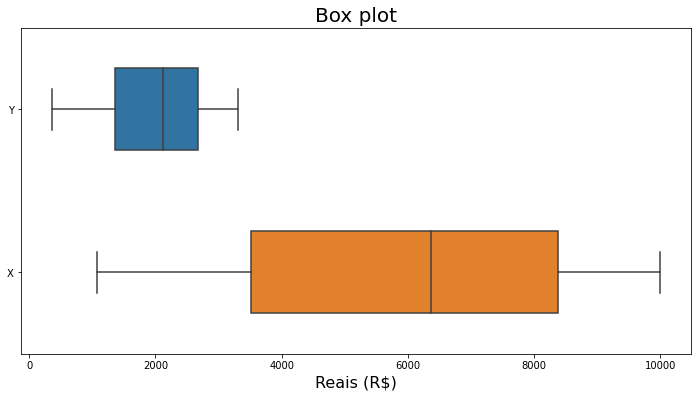

In [81]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

https://seaborn.pydata.org/generated/seaborn.lmplot.html

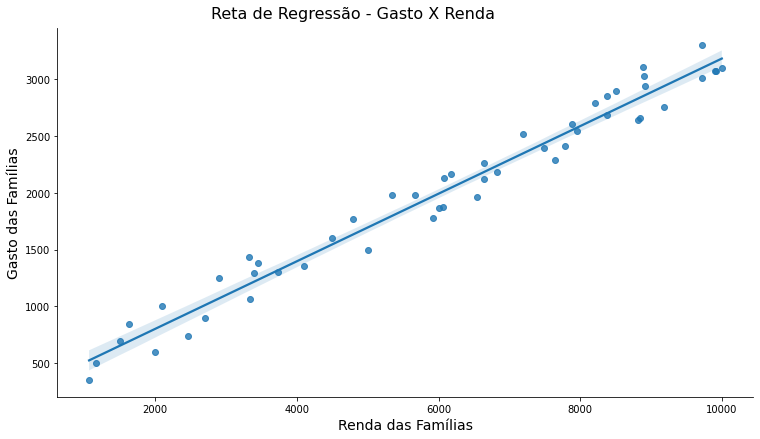

In [82]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

### Análise da correlação

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [83]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Modelo de regressão linear simples

https://www.statsmodels.org/stable/regression.html

In [84]:
import statsmodels.api as sm

In [85]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [86]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [87]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


### Estimando o modelo

In [88]:
resultado_regressao = sm.OLS(Y, X).fit()

In [89]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           3.56e-38
Time:                        18:55:40   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Obtendo as previsões dentro da amostra

In [90]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


---

# <font color=green>3 CORRELAÇÃO</font>
***

## <font color=green>3.1 Covariância</font>
***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

### Gerando uma amostra aleatória para facilitar o entendimento

In [91]:
amostra = dados.query('Renda < 5000').sample(n=20, random_state=101)

### Obtendo a matriz de covariância

In [92]:
# na diagonal da matriz teremos as variancias das variáveis

amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


### Identificando as variâncias na diagonal principal da matriz

In [93]:
amostra.Idade.var()

134.4105263157895

## <font color=green>3.2 Interpretação da Covariância</font>
***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Verificando a existência de uma associação linear negativa

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


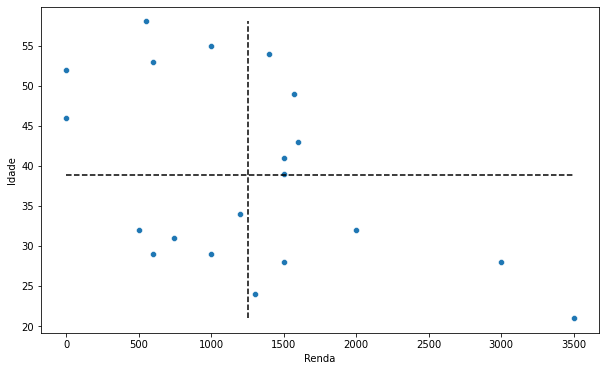

In [94]:
x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

### Verificando a existência de uma associação linear positiva

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


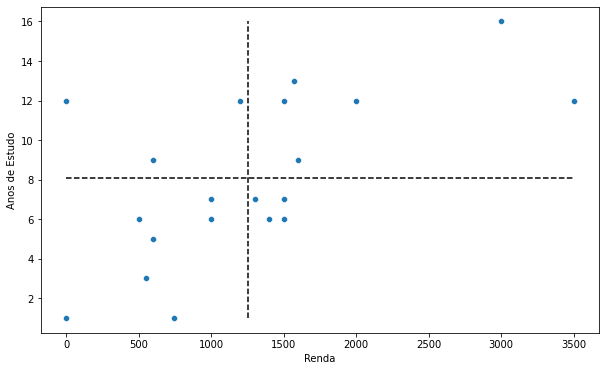

In [95]:
x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

### Verificando a inexistência de uma associação linear entre as variáveis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


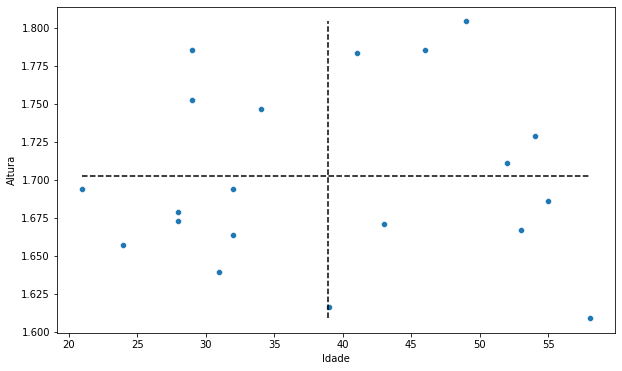

In [96]:
x = amostra.Idade
y = amostra.Altura

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

### <font color='red'>Observação Importante:</font>
> Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.
> 
> Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.

## <font color=green>3.3 Coeficiente de correlação de Pearson</font>
***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

### Obtendo $s_{xy}$

In [97]:
s_xy = dados[['Altura', 'Renda']].cov()

In [98]:
s_xy= s_xy.Altura.loc['Renda']
s_xy

-1.0789639314252715

### Obtendo $s_x$ e $s_y$

In [99]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

### Obtendo o coeficiente de correlação $r_{xy}$

In [100]:
r_xy = s_xy / (s_x * s_y)
r_xy

-0.0040726081434002874

### Obtendo uma matriz de correlação com o Pandas

In [101]:
dados[['Altura', 'Renda']].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [102]:
dataset[['Y', 'X']].corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


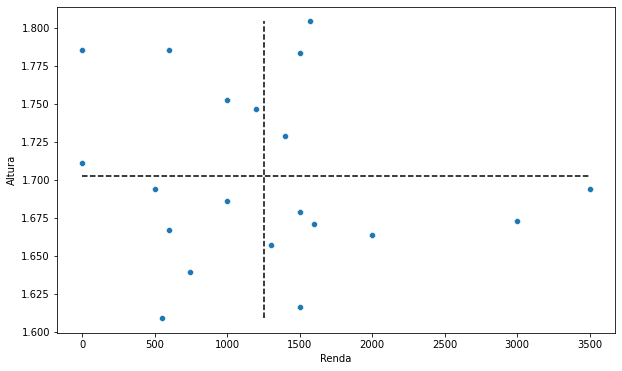

In [103]:
x = amostra.Renda
y = amostra.Altura

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


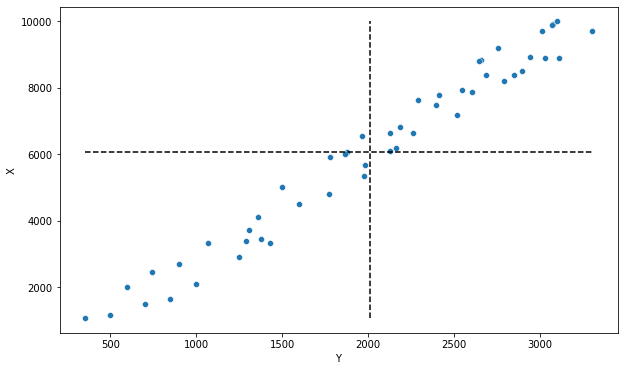

In [104]:
x = dataset.Y
y = dataset.X

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

Exercício

Temos o seguinte conjunto de informações sobre as variáveis X e Y:


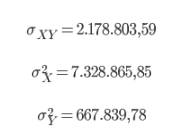


Assinale a alternativa abaixo que apresenta o valor do coeficiente de correlação de Pearson para as variáveis X e Y.

In [105]:
sigma_xy = 2178803.59
sigma_x = np.sqrt(7328865.85)
sigma_y = np.sqrt(667839.78)

In [106]:
corr_xy = sigma_xy / (sigma_x * sigma_y)
corr_xy

0.984835179852382

---

# <font color=green>4 REGRESSÃO LINEAR</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## <font color=green>4.1 Regressão linear simples</font>
***

### Função consumo

Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### Carregando o dataset

In [107]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [108]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


### Identificando a relação entre as variáveis

https://seaborn.pydata.org/generated/seaborn.lmplot.html

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

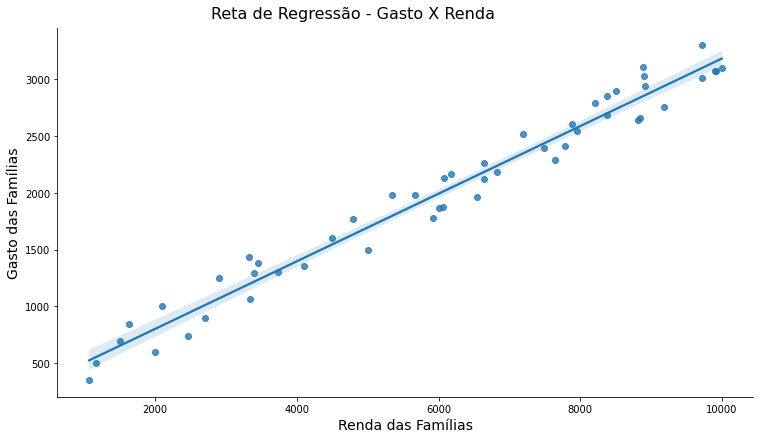

In [109]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

### Matriz de correlação

In [110]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Função de regressão populacional

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

O gráfico de dispersão acima deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = E(Y|X_i) + u_i$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também cohecida como termo de erro estocástico.

Observe que a podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

## <font color=green>4.2 O método de mínimos quadrados</font>
***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

## <font color=green>4.3 Estimadores de mínimos quadrados ordinários</font>
***

### Obter $n$

In [111]:
n = len(dataset)
n

50

### Obter $\sum{Y}$

In [112]:
SOMA_Y = dataset.Y.sum()
SOMA_Y

100556

### Obter $\sum{X}$

In [113]:
SOMA_X = dataset.X.sum()
SOMA_X

303275

### Obter $\sum{X^2}$

In [114]:
dataset['X2'] = dataset.X ** 2
dataset.head()

,Y,X,X2
0,3011,9714,94361796
1,1305,3728,13897984
2,1879,6062,36747844
3,2654,8845,78234025
4,2849,8378,70190884


In [115]:
SOMA_X2 = dataset.X2.sum()
SOMA_X2

2198628939

In [116]:
# outra forma de obter a soma dos x ao quadrado
SOMA_X2 = dataset.X.apply(lambda x: x**2).sum()
SOMA_X2

2198628939

### Obter $\sum{Y^2}$

In [117]:
SOMA_Y2 = dataset.Y.apply(lambda y: y**2).sum()
SOMA_Y2

234954332

### Obter $\sum{XY}$

In [118]:
dataset['XY'] = dataset.X * dataset.Y
dataset.head()

,Y,X,X2,XY
0,3011,9714,94361796,29248854
1,1305,3728,13897984,4865040
2,1879,6062,36747844,11390498
3,2654,8845,78234025,23474630
4,2849,8378,70190884,23868922


In [119]:
SOMA_XY = dataset.XY.sum()
SOMA_XY

716683794

In [120]:
SOMA_XY = dataset.apply(lambda data: data.X * data.Y, axis = 'columns').sum()
SOMA_XY

716683794

In [121]:
dataset.drop(['X2', 'XY'], axis = 1, inplace=True)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


### Obter $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [122]:
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X) ** 2
beta_2 = numerador / denominador
beta_2

0.29729069099372424

### Obter $\hat{\beta}_1$

# $$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
$$ 

In [123]:
beta_1 = dataset.Y.mean() - beta_2 * dataset.X.mean()
beta_1

207.90331377756547

### Obtendo a estimativa dos parâmetros com o StatsModels

### Importando a biblioteca
https://www.statsmodels.org/stable/index.html

In [124]:
import statsmodels.api as sm

In [125]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [126]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [127]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


### Estimando o modelo

In [128]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

### Visualizando os parâmetros estimados

In [129]:
beta_1

207.90331377756547

In [130]:
beta_2

0.29729069099372424

In [131]:
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

In [132]:
beta_1 = resultado_regressao.params[0]
beta_1

207.90331377756553

In [133]:
beta_2 = resultado_regressao.params[1]
beta_2

0.29729069099372435

### Intervalo de confiança para os parâmetros estimados

In [134]:
resultado_regressao.conf_int(alpha = 0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


Exercício

Acredita-se que a posse de computadores tenha uma relação linear com a renda das famílias e para comprovar isso, podemos estimar uma regressão linear com os dados acima e avaliar os resultados obtidos.

Neste problema, precisamos, inicialmente, obter as estimativas dos parâmetros de regressão.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para obter os parâmetros.


In [135]:
dataset_exer = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

In [136]:
dataset_exer = pd.DataFrame(dataset_exer)
Y_exer = dataset_exer.Y
X_exer = sm.add_constant(dataset_exer.X)
resultado_regressao_exer = sm.OLS(Y_exer, X_exer).fit()
beta_1_exer = resultado_regressao_exer.params[0]
beta_2_exer = resultado_regressao_exer.params[1]
print(f'β1 = {beta_1_exer}\nβ2 = {beta_2_exer}')

β1 = -168.32115590461154
β2 = 481.39039694214773


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## <font color=green>4.4 Obtendo previsões</font>
***

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### Previsões dentro da amostra

In [137]:
dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


### Utilizando o statsmodels

In [138]:
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto,Y_previsto_statsmodels
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723


In [139]:
dataset.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True)
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


### Estimando o 'Gasto das Famílias' fora da amostra

In [140]:
def prever(x):
  return beta_1 + beta_2 * x

In [141]:
prever(7510)

2440.556403140435

### Estimando o 'Gasto das Famílias' fora da amostra via StatsModels

In [144]:
# o 1 no primeiro parametro é a constante
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

Exercício

Considerando os dados do problema anterior, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias, após estimarmos o modelo (problema anterior), suponha que seja criado um estado e que este apresente uma renda total de R$ 2.345.678.


Assinale a alternativa que apresenta a previsão (valor arredondado) para o número de domicílios que possuem computador neste novo estado da federação.

In [146]:
resultado_regressao_exer.predict([1, 2.345678])[0]

960.8657076138518

## <font color=green>4.5 Resíduos</font>
***

Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [147]:
dataset['u'] = dataset.Y - dataset.Y_previsto
dataset.head()

,Y,X,Y_previsto,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [148]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,Y,X,Y_previsto,u,Residuos
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [149]:
dataset.drop(['u'], axis = 1, inplace = True)
dataset.head()

,Y,X,Y_previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [150]:
dataset.Residuos.mean()

-5.525180313270539e-13

## <font color=green>4.6 Suposições sobre o termo de erro $u$</font>
***

### 1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
### 2. A variância de $u$ é a mesma para todos os valores de $X$
### 3. O valores de $u$ são independentes
### 4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

### Plotando os resíduos do modelo

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

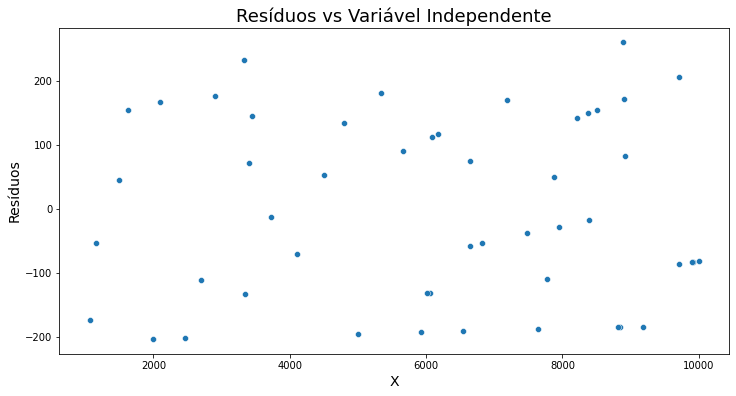

In [151]:
ax = sns.scatterplot(x=dataset.X, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Quando a gente estiver trabalhando com modelo de regressão linear múltipla, quando você estiver fazendo isso, você vai ter que dar preferência a este gráfico que a gente vai fazer agora, onde a gente vai plotar o Y previsto, está ele aqui já no eixo X, contra o resíduo no eixo Y. Isso porque no modelo de regressão linear múltipla, a gente tem vários X, pode ter 2, pode ter 3, várias variáveis independentes. Você teria que plotar um gráfico para cada variável e isso deturparia.

O que você tem que fazer é pegar o Y que foi previsto, que leva em consideração todas essas variáveis, e plotar ele contra o resíduo. Aqui, no nosso caso, como a gente só tem uma variável, ele vai ficar, se você reparar, idêntico ao de cima.

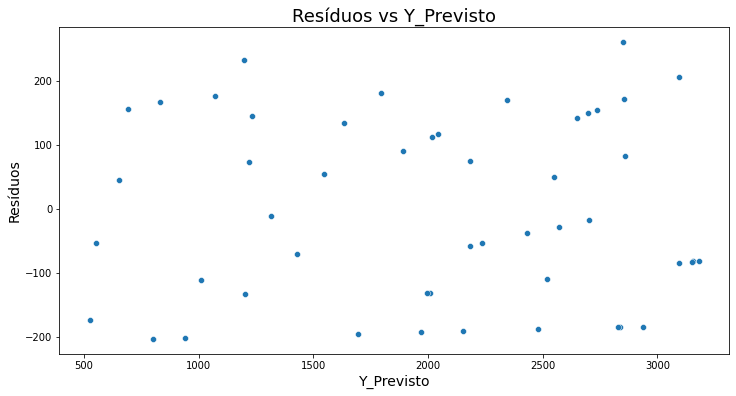

In [152]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Mas, eu queria mostrar isso aqui porque estamos no simples, depois você pode pegar uma regressão múltipla, que é o mais comum, isso aqui é para entendermos. É mais comum uma regressão linear múltipla, onde tem mais variáveis, você vai se deparar com ter que tratar esse gráfico, então você pode ficar perdido.

### Hipótese de variância constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

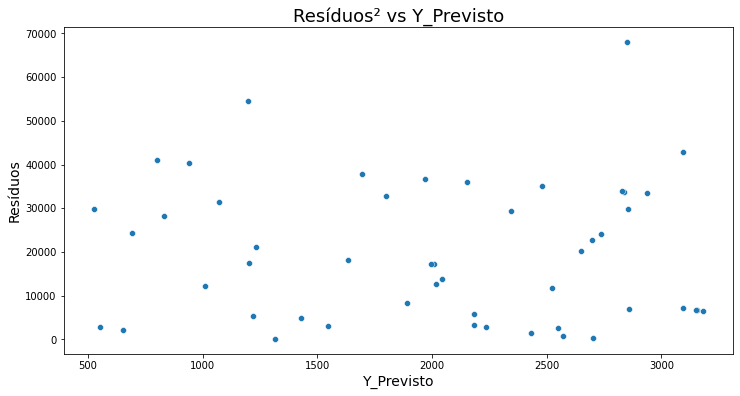

In [153]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## <font color=green>4.7 O coeficiente de determinação $R^2$</font>
***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Soma do quadrados do erros (SQE)

### Soma do quadrados total (SQT)

### Soma do quadrados da regressão (SQR)

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

Onde,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

### Coeficiente de determinação (R²)

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Observação</font>
> Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

## <font color=green>4.8 Testes aplicados a modelos de regressão</font>
***

Como vimos, em uma regressão linear simples, a média da variável dependente ($Y$) é uma função linear da variável independente ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

Se o valor de $\beta_2$ for zero podemos verificar que o valor médio de $Y$ não depende do valor de $X$ e, portanto, concluímos que $X$ e $Y$ não estão linearmente relacionados. De forma alternativa, se o valor de $\beta_2$ não for igual a zero, concluímos que as duas variáveis estão relacionadas.

Para testar se a relação de regressão é significativa, é preciso realizar um **teste de hipóteses** para determinar se o valor de $\beta_2$ é zero. Antes de realizar este tipo de teste precisamos obter uma estimativa para $\sigma^2$ (variância do erro).

### Output do modelo de regressão estimado

### Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

# $$EQM = \frac{SQE}{n-2}$$

### Teste de hipótese para nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculando $s$

### Calculando $\sum{(X_i - \bar{X})^2}$

### Calculando $s_{b_2}$

### Determinando as áreas de aceitação e rejeição de $H_0$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

### Níveis de confiança e significância

### Obtendo $t_{\alpha/2}$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img032.png)

### Obtendo $t = \frac{b_2 - \beta_2}{s_{b_2}}$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img033.png)

### Etapas e regras de decisão do teste t de significância dos parâmetros

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

---

### Teste F

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

### Calculando a estatística de teste ($F$)

### Obtendo o p-valor

# <font color=green>5 EXTRAS</font>
***

## <font color=green>5.1 Outros testes</font>
***

### Normalidade dos resíduos - Omnibus

> ### $H_0:$ Os dados se distribuem como uma normal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

### Verificando a simetria

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

### Verificando a curtose

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

### Normalidade dos resíduos - Jarque-Bera (statsmodels)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

### Normalidade dos resíduos - Jarque-Bera (Correção)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n-k}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $k$ - número de parâmetros do modelo
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose